# Étude matériaux composites - Analyse & Modélisation

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Chargement des données

In [ ]:
df = pd.read_csv("AptiSkills/data/processed/MHK_material_database_cleaned.csv")
print(df.columns.tolist())
print(df.head())

['Material', 'Lay-up', 'Vf, %', 'Resin Type', 'Resin', '0 Deg fabric name', '45 Deg fabric name', '45 Deg fabric %', '90 Deg fabric name', '90 Deg fabric %', 'other %', 'Thickness, mm', 'Cure / Post Cure', 'Process', 'Test #', 'Coupon', 'Max. Stress, MPa', 'Min. Stress, MPa', 'R-value', 'Freq., Hz or mm/s', 'E, GPa (0.1-0.3%)', 'Max. % Strain', 'Cycles', 'Moisture Gain, %', 'Contractor report', 'Conference Paper']
  Material           Lay-up  Vf, % Resin Type                Resin  \
0      CE1  [V(+/-45)g/0c]S   40.4      Epoxy  Pro-set INF 114/211   
1      CE1  [V(+/-45)g/0c]S   42.4      Epoxy  Pro-set INF 114/211   
2      CE1  [V(+/-45)g/0c]S   39.3      Epoxy  Pro-set INF 114/211   
3      CE1  [V(+/-45)g/0c]S   44.8      Epoxy  Pro-set INF 114/211   
4      CE1  [V(+/-45)g/0c]S   45.5      Epoxy  Pro-set INF 114/211   

  0 Deg fabric name 45 Deg fabric name 45 Deg fabric % 90 Deg fabric name  \
0      Zoltek UD600          E-BX-1700          42.2 G                  0   
1      

 ## Base de données SQLite

In [ ]:
# base SQLite enregistrée localement
conn = sqlite3.connect("../data/processed/materiaux.db")
df.to_sql("TableBrute", conn, if_exists="replace", index=False)

# vérifier
test = pd.read_sql("SELECT * FROM TableBrute LIMIT 5", conn)
print(test)

  Material           Lay-up  Vf, % Resin Type                Resin  \
0      CE1  [V(+/-45)g/0c]S   40.4      Epoxy  Pro-set INF 114/211   
1      CE1  [V(+/-45)g/0c]S   42.4      Epoxy  Pro-set INF 114/211   
2      CE1  [V(+/-45)g/0c]S   39.3      Epoxy  Pro-set INF 114/211   
3      CE1  [V(+/-45)g/0c]S   44.8      Epoxy  Pro-set INF 114/211   
4      CE1  [V(+/-45)g/0c]S   45.5      Epoxy  Pro-set INF 114/211   

  0 Deg fabric name 45 Deg fabric name 45 Deg fabric % 90 Deg fabric name  \
0      Zoltek UD600          E-BX-1700          42.2 G                  0   
1      Zoltek UD600          E-BX-1700          42.2 G                  0   
2      Zoltek UD600          E-BX-1700          42.2 G                  0   
3      Zoltek UD600          E-BX-1700          42.2 G                  0   
4      Zoltek UD600          E-BX-1700          42.2 G                  0   

  90 Deg fabric %  ... Max. Stress, MPa  Min. Stress, MPa R-value  \
0               0  ...            683.0        

## Statistiques descriptives (SQL)

### Requête 1 – Moyenne de la contrainte maximale par matériau

In [4]:
query1 = """
SELECT Material, AVG("Max. Stress, MPa") AS avg_max_stress
FROM TableBrute
GROUP BY Material
ORDER BY avg_max_stress DESC
"""

df_result1 = pd.read_sql(query1, conn)
print(df_result1)

                                             Material  avg_max_stress
0                             FAU_Long_term_Saturated     2495.250000
1                               FAU_Long_term_control     2281.600000
2                                      Carbon prepreg     1674.914894
3                        Carbon/glass hybrid prepregs     1053.351351
4                                             C38/C39      837.388889
..                                                ...             ...
69                                MD-DD5E3-EP3-Enviro             NaN
70                                MD-DD11P-UP2-Enviro             NaN
71                            MD-DD11E4-Jeffco-Enviro             NaN
72                               MD-DD11E3-EP3-Enviro             NaN
73  Earlier Materials - Environmental testing of d...             NaN

[74 rows x 2 columns]


### Requête 2 – Moyenne du module d’élasticité (E) par type de résine

In [5]:
query2 = """
SELECT "Resin Type", AVG("E, GPa (0.1-0.3%)") AS avg_E
FROM TableBrute
GROUP BY "Resin Type"
ORDER BY avg_E DESC
"""

df_result2 = pd.read_sql(query2, conn)
print(df_result2)


    Resin Type      avg_E
0        Epoxy  58.197307
1           TP  42.728571
2          VE7  41.810417
3           UA  39.395000
4         EP-9  32.722727
5        EP-10  32.063636
6          EP1  29.048466
7         None  29.000000
8           VE  28.938073
9          PA6  21.573091
10        PA11  20.238491
11         PET  19.548654
12        PETG  19.124471
13        HDPE  18.448148
14          PP  17.386379
15          EP  14.696471
16         UP4  14.216901
17         VE2  13.716000
18         UP2  13.308842
19  Resin Type        NaN
20         EP3        NaN
21    Adhesive        NaN


### Requête 3 – Moyenne du pourcentage de fibres (Vf) par type de lay-up

In [6]:
query3 = """
SELECT "Lay-up", AVG("Vf, %") AS avg_vf
FROM TableBrute
GROUP BY "Lay-up"
ORDER BY avg_vf DESC
"""

df_result3 = pd.read_sql(query3, conn)
print(df_result3)

               Lay-up     avg_vf
0               [90]6  60.075000
1   [(0/90)(45/-45)]4  59.659524
2      [0/45/90/-45]8  59.584211
3             [90/0]s  59.326667
4              (±45)4  58.950000
5                (0)6  57.987037
6              [0b]2S  57.051429
7            (+/-45)8  57.000000
8                (0)2  56.927419
9            (+/-45)6  56.752381
10              (90)6  56.298333
11            [0/90]s  56.270000
12     (±45/(0)2/±45)  56.232432
13              [90]2  56.000000
14           (90/0)2S  55.335417
15     [0/45/90/-45]4  54.016304
16            (0/90)9  53.172222
17              [±15]  50.200000
18              [±30]  48.900000
19              [±45]  48.600000
20              [45]2  48.528571
21              [30]2  48.528571
22              [15]2  48.528571
23               [0]4  48.400000
24               [0]2  47.096667
25            (0/90)5  47.003636
26   [V/0/45/-45/0/V]  41.894737
27               [0]6  39.800000
28    [V(+/-45)g/0c]S  38.914384
29        

### Requête 4 – Moyenne de l'épaisseur par matériau

In [7]:
query4 = """
SELECT Material, AVG("Thickness, mm") AS avg_thickness
FROM TableBrute
GROUP BY Material
ORDER BY avg_thickness DESC
"""

df_result4 = pd.read_sql(query4, conn)
print(df_result4)

                                             Material  avg_thickness
0                                                  J7       5.664211
1                                                  J8       4.991667
2                                                  J6       4.962500
3                                                  J3       4.916552
4                                                  J4       4.838750
..                                                ...            ...
69                                            C36/C37       1.273333
70                                            C34/C35       1.181111
71                                            C32/C33       1.081053
72                                           Material            NaN
73  Earlier Materials - Environmental testing of d...            NaN

[74 rows x 2 columns]


### Requête 5 – Moyenne de la contrainte max par type de résine

In [8]:
query5 = """
SELECT "Resin", AVG("Max. Stress, MPa") AS avg_max_stress
FROM TableBrute
GROUP BY "Resin"
ORDER BY avg_max_stress DESC
"""

df_result5 = pd.read_sql(query5, conn)
print(df_result5)

                                                Resin  avg_max_stress
0                                   Derakane 510A-40      2413.076923
1                                            SparPreg     1401.130952
2                                                None      769.027397
3                                     Ashland 601-200      725.875000
4                            Glass/Elium + 3% Luperox      615.657143
5                                 Pro-set INF 114/211      493.318966
6                          Hexion RIMR 035c/RIMH 0366      476.170000
7                 Crestapol 1250PUL urethane Acrylate      454.596429
8    Hexion RIMR 035C / RIMH 037 resin (100:28 by wt)      426.081081
9                         Hexion MGS RIMR135/RIMH1366      413.536410
10  Hexion RIMR 145/RIMH 145/RIMC 145 (100:82:0.3 ...      394.306250
11                              AME 6001 VE +1.5% MCP      385.578947
12                                                PET      347.744231
13                  

### Requête 6 – Moyenne de la déformation max (% strain) par matériau

In [9]:
query6 = """
SELECT Material, AVG("Max. % Strain") AS avg_strain
FROM TableBrute
GROUP BY Material
ORDER BY avg_strain DESC
"""

df_result6 = pd.read_sql(query6, conn)
print(df_result6)

                Material  avg_strain
0      MD-DD5V-VE-Enviro    4.440000
1    MD-DD5V2-VE2-Enviro    4.100000
2    MD-DD5E-SC14-Enviro    3.796667
3     MD-DD5P-UP2-Enviro    2.274500
4                     P6    2.156087
..                   ...         ...
69   Biax-CH5-UP2-Enviro         NaN
70  Biax-CH5-SC14-Enviro         NaN
71   Balanced_Full_Satur         NaN
72          Balanced_Dry         NaN
73    Adhesive shear lap         NaN

[74 rows x 2 columns]


### Requête 7 – Moyenne du nombre de cycles par matériau

In [10]:
query7 = """
SELECT Material, AVG(Cycles) AS avg_cycles
FROM TableBrute
GROUP BY Material
ORDER BY avg_cycles DESC
"""

df_result7 = pd.read_sql(query7, conn)
print(df_result7)

                                             Material     avg_cycles
0                                             DB-BIAX  704386.200000
1                                     DB-BIAX-DH3-EP1  686119.326087
2                                   MD-DD5P-VE-Enviro  538492.272727
3                                  MD-DD5P-VE2-Enviro  410177.357143
4                                    UNI-PPG1250-EP10  258401.020408
..                                                ...            ...
69                                       Balanced_dry       1.000000
70                                Balanced_Full_Satur       1.000000
71                                       Balanced_Dry       1.000000
72                                           Material            NaN
73  Earlier Materials - Environmental testing of d...            NaN

[74 rows x 2 columns]


### Requête 8 – Moyenne de la prise d’humidité (%) par matériau

In [11]:
query8 = """
SELECT Material, AVG("Moisture Gain, %") AS avg_moisture
FROM TableBrute
GROUP BY Material
ORDER BY avg_moisture DESC
"""

df_result8 = pd.read_sql(query8, conn)
print(df_result8)

                    Material  avg_moisture
0            DB-BIAX-DH3-EP1  1.003108e+06
1                    DB-BIAX  5.847196e+05
2                        P13  3.000000e+00
3                        P12  1.850000e+00
4                         P4  1.728571e+00
..                       ...           ...
69  Balanced_full_Saturation           NaN
70              Balanced_dry           NaN
71       Balanced_Full_Satur           NaN
72              Balanced_Dry           NaN
73        Adhesive shear lap           NaN

[74 rows x 2 columns]


### Requête 9 – Moyenne du R-value par type de résine

In [12]:
query9 = """
SELECT "Resin Type", AVG("R-value") AS avg_r_value
FROM TableBrute
GROUP BY "Resin Type"
ORDER BY avg_r_value DESC
"""

df_result9 = pd.read_sql(query9, conn)
print(df_result9)

    Resin Type  avg_r_value
0          VE2    10.000000
1          UP2     8.515000
2           VE     4.364615
3     Adhesive     0.657746
4          VE7     0.100000
5           TP     0.100000
6         PETG     0.100000
7          PA6     0.100000
8         PA11     0.100000
9          PET     0.100000
10        HDPE     0.100000
11          PP     0.100000
12          UA     0.100000
13        EP-9     0.100000
14       EP-10     0.100000
15         EP1     0.100000
16       Epoxy     0.100000
17         UP4          NaN
18  Resin Type          NaN
19         EP3          NaN
20          EP          NaN
21        None          NaN


#### Requête 10 – Moyenne du Max Stress par fréquence de test (arrondie)

In [13]:
query10 = """
SELECT ROUND("Freq., Hz or mm/s", 3) AS freq, AVG("Max. Stress, MPa") AS avg_stress
FROM TableBrute
WHERE "Freq., Hz or mm/s" IS NOT NULL
GROUP BY freq
ORDER BY avg_stress DESC
"""

df_result10 = pd.read_sql(query10, conn)
print(df_result10)

      freq   avg_stress
0    0.500  1053.000000
1    1.300  1000.000000
2    1.400   621.000000
3    3.000   467.434941
4    1.000   464.046000
5    0.025   408.768333
6    0.017   346.523810
7    1.200   316.000000
8    1.500   309.179380
9    2.500   265.272727
10   2.000   261.587290
11   2.200   138.000000
12   5.000    -4.873810
13   4.000    -7.387273
14  10.000   -25.385714
15   8.000   -26.670000
16   7.000   -27.087500
17   6.000   -34.062500


### MCD — Modèle Conceptuel de Données

**Entités principales :**

1. **Resin**
   - id (clé primaire)
   - nom
   - type
   - r_value

2. **Fibre**
   - id
   - nom

3. **Material**
   - id
   - nom
   - layup
   - resin_id (clé étrangère)
   - fibre_id (clé étrangère)

4. **Test**
   - id
   - material_id (clé étrangère)
   - Vf, %
   - Thickness
   - Max. Stress
   - Max. Strain
   - Cycles
   - E
   - Moisture Gain

5. **Conditions**
   - id
   - test_id (clé étrangère)
   - Frequency
   - Environment


In [14]:
conn = sqlite3.connect("materiaux.db")
cursor = conn.cursor()

# suppression des tables existantes
cursor.executescript("""
DROP TABLE IF EXISTS Document;
DROP TABLE IF EXISTS Test;
DROP TABLE IF EXISTS Material;
DROP TABLE IF EXISTS Fibre;
DROP TABLE IF EXISTS Resin;
""")

# création des tables
cursor.executescript("""
CREATE TABLE Resin (
    id INTEGER PRIMARY KEY,
    name TEXT,
    type TEXT,
    r_value REAL
);

CREATE TABLE Fibre (
    id INTEGER PRIMARY KEY,
    name_0deg TEXT,
    name_45deg TEXT,
    perc_45deg REAL,
    name_90deg TEXT,
    perc_90deg REAL,
    perc_other REAL
);

CREATE TABLE Material (
    id INTEGER PRIMARY KEY,
    name TEXT,
    layup TEXT,
    resin_id INTEGER,
    fibre_id INTEGER,
    FOREIGN KEY (resin_id) REFERENCES Resin(id),
    FOREIGN KEY (fibre_id) REFERENCES Fibre(id)
);

CREATE TABLE Test (
    id INTEGER PRIMARY KEY,
    material_id INTEGER,
    vf REAL,
    thickness REAL,
    max_stress REAL,
    min_stress REAL,
    strain REAL,
    cycles INTEGER,
    e_modulus REAL,
    freq REAL,
    moisture_gain REAL,
    FOREIGN KEY (material_id) REFERENCES Material(id)
);

CREATE TABLE Document (
    id INTEGER PRIMARY KEY,
    test_id INTEGER,
    contractor_report TEXT,
    conference_paper TEXT,
    FOREIGN KEY (test_id) REFERENCES Test(id)
);
""")

conn.commit()
print("Tables créées avec succès.")


Tables créées avec succès.


### Remplir les tables à partir du DataFrame

In [ ]:
df = pd.read_csv("../data/processed/MHK_material_database_cleaned.csv")

# extraire les colonnes utiles
resin_df = df[['Resin', 'Resin Type', 'R-value']].dropna(subset=['Resin'])

# supprimer les doublons
resin_df = resin_df.drop_duplicates()

# réindexer pour ajouter un ID unique
resin_df = resin_df.reset_index(drop=True)
resin_df['id'] = resin_df.index + 1

# réorganiser l’ordre des colonnes pour correspondre à la table
resin_df = resin_df[['id', 'Resin', 'Resin Type', 'R-value']]
resin_df.columns = ['id', 'name', 'type', 'r_value']  # correspondance avec table Resin

# insertion
resin_df.to_sql('Resin', conn, if_exists='append', index=False)
print("Table Resin remplie.")

Table Resin remplie.


### Remplissage de la table Material à partir du fichier CSV

In [ ]:
df = pd.read_csv("../data/processed/MHK_material_database_cleaned.csv")

# colonnes utiles pour Material
material_df = df[['Material', 'Lay-up', 'Resin']].dropna(subset=['Material', 'Resin']).drop_duplicates()

# Resin pour retrouver resin_id
material_df = material_df.merge(resin_df[['id', 'name']], how='left', left_on='Resin', right_on='name')

# renommer les colonnes
material_df = material_df.rename(columns={'id': 'resin_id'})
material_df = material_df[['Material', 'Lay-up', 'resin_id']]

# supprimer les doublons
material_df = material_df.drop_duplicates().reset_index(drop=True)

# ajouter un ID unique
material_df['id'] = material_df.index + 1

# réorganiser et renommer les colonnes selon la table SQL
material_df = material_df[['id', 'Material', 'Lay-up', 'resin_id']]
material_df.columns = ['id', 'name', 'layup', 'resin_id']

# inisérer
material_df.to_sql('Material', conn, if_exists='append', index=False)
print(" Table Material remplie.")

 Table Material remplie.


### Remplir la table Test

In [ ]:
conn = sqlite3.connect("../data/processed/materiaux.db")

df = pd.read_csv("../data/processed/MHK_material_database_cleaned.csv")

material_df = pd.read_sql("SELECT * FROM Material", conn)

# ajouter la colonne 'e' à la table Test
try:
    conn.execute("ALTER TABLE Test ADD COLUMN e FLOAT;")
    conn.commit()
    print("Colonne 'e' ajoutée à la table Test.")
except sqlite3.OperationalError:
    print("Colonne 'e' déjà existante, on continue.")

# mapper les Material.id
material_name_to_id = dict(zip(material_df['name'], material_df['id']))

# préparer les données du test
test_df = df[['Material', 'Vf, %', 'Thickness, mm', 'Max. Stress, MPa', 'Max. % Strain', 'Cycles', 'E, GPa (0.1-0.3%)']].copy()
test_df = test_df.dropna(subset=['Vf, %', 'Max. Stress, MPa'])

# renommer les colonnes pour correspondre à la table Test
test_df = test_df.rename(columns={
    'Material': 'material_name',
    'Vf, %': 'vf',
    'Thickness, mm': 'thickness',
    'Max. Stress, MPa': 'max_stress',
    'Max. % Strain': 'strain',
    'Cycles': 'cycles',
    'E, GPa (0.1-0.3%)': 'e'
})

# ajouter l'id du matériau
test_df['material_id'] = test_df['material_name'].map(material_name_to_id)

# supprimer les lignes sans correspondance
test_df = test_df.dropna(subset=['material_id'])

# réindexer et ajouter un ID
test_df = test_df.reset_index(drop=True)
test_df['id'] = test_df.index + 1

# réorganiser les colonnes
test_df = test_df[['id', 'material_id', 'vf', 'thickness', 'max_stress', 'strain', 'cycles', 'e']]

# nsérer
test_df.to_sql('Test', conn, if_exists='append', index=False)
print("Table Test remplie.")


Colonne 'e' ajoutée à la table Test.
Table Test remplie.


## 4. Visualisations

### Scatterplot Vf (%) vs Max. Stress (MPa)

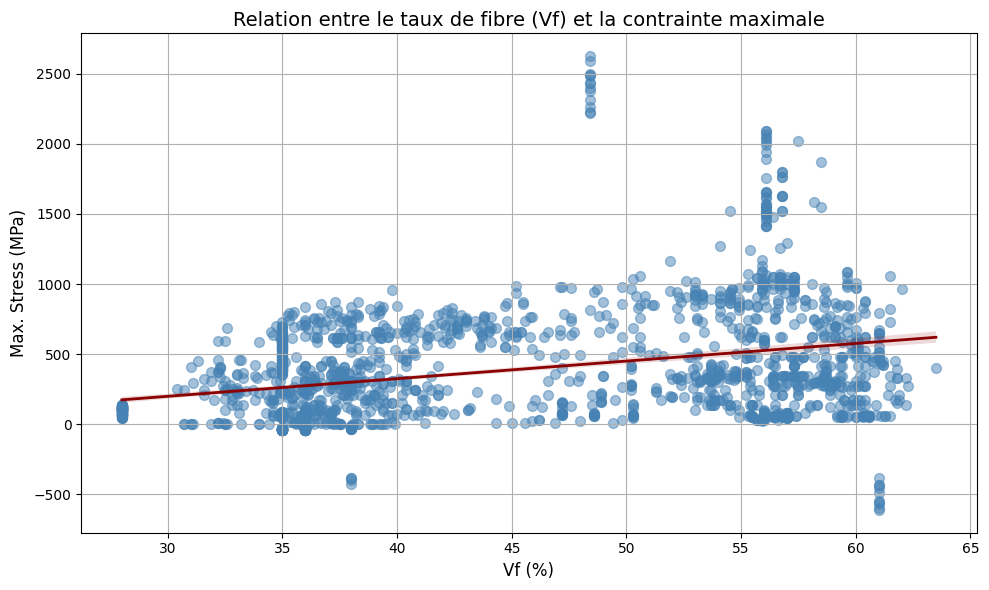

In [18]:
# Conversion des colonnes au bon format
df["Vf, %"] = pd.to_numeric(df["Vf, %"], errors="coerce")
df["Max. Stress, MPa"] = pd.to_numeric(df["Max. Stress, MPa"], errors="coerce")

# Suppression des valeurs manquantes
df_clean = df.dropna(subset=["Vf, %", "Max. Stress, MPa"])

# Création du graphique
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="Vf, %",
    y="Max. Stress, MPa",
    scatter_kws={"alpha": 0.5, "s": 50, "color": "steelblue"},
    line_kws={"color": "darkred", "linewidth": 2}
)

# Mise en forme
plt.title("Relation entre le taux de fibre (Vf) et la contrainte maximale", fontsize=14)
plt.xlabel("Vf (%)", fontsize=12)
plt.ylabel("Max. Stress (MPa)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Boxplot Resin Type vs E, GPa (0.1-0.3%)

Le module E (0.1–0.3 %) est une mesure fiable, reproductible et pertinente pour évaluer la rigidité mécanique initiale des composites, sans être biaisé par les défauts de test ou les effets non linéaires.

C:\Users\adam2\AppData\Local\Temp\ipykernel_15856\2294675850.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box_filtered, x="Resin Type", y="E, GPa (0.1-0.3%)", palette="pastel")


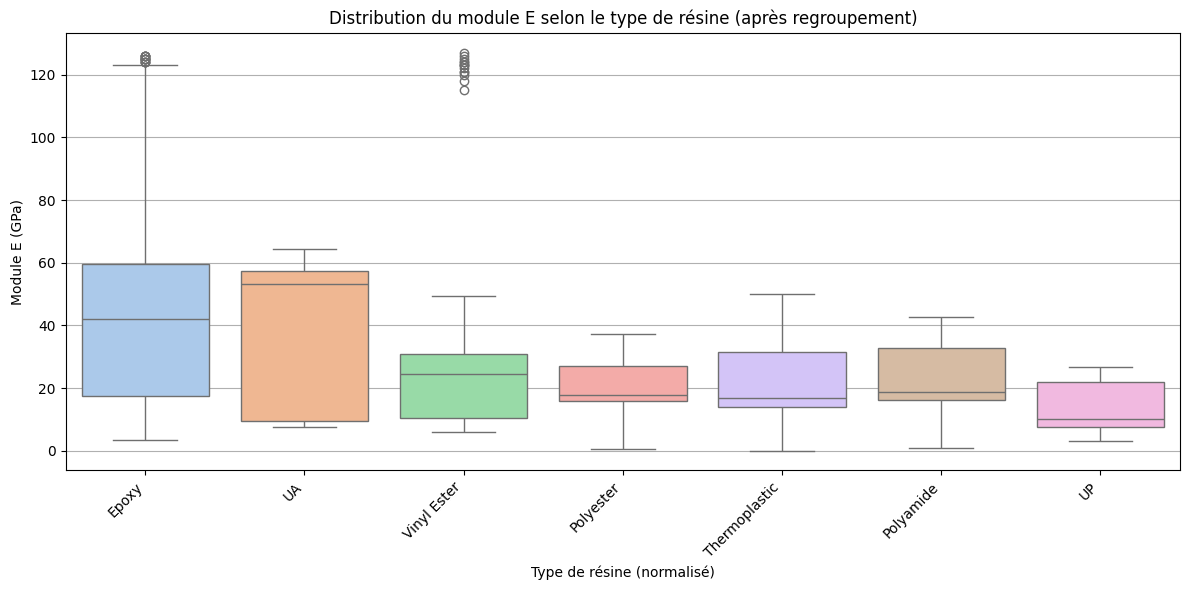

In [19]:
# mise au format numérique de la colonne
df["E, GPa (0.1-0.3%)"] = pd.to_numeric(df["E, GPa (0.1-0.3%)"], errors="coerce")

# normalisation des types de résine
resin_mapping = {
    "EP": "Epoxy", "EP-10": "Epoxy", "EP-9": "Epoxy", "EP1": "Epoxy", "EP3": "Epoxy", "epoxy": "Epoxy",
    "VE": "Vinyl Ester", "VE2": "Vinyl Ester", "VE7": "Vinyl Ester",
    "UP2": "UP", "UP4": "UP",
    "PA6": "Polyamide", "PA11": "Polyamide",
    "PET": "Polyester", "PETG": "Polyester",
    "TP": "Thermoplastic", "HDPE": "Thermoplastic", "PP": "Thermoplastic"
}

df["Resin Type"] = df["Resin Type"].replace(resin_mapping)

# nettoyage des NaN
df_box = df.dropna(subset=["Resin Type", "E, GPa (0.1-0.3%)"])
# pour filtrer les types de résines avec assez d’échantillons
resin_counts = df_box["Resin Type"].value_counts()
resins_to_plot = resin_counts[resin_counts >= 10].index  # on garde les résines avec ≥ 10 valeurs
df_box_filtered = df_box[df_box["Resin Type"].isin(resins_to_plot)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box_filtered, x="Resin Type", y="E, GPa (0.1-0.3%)", palette="pastel")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution du module E selon le type de résine (après regroupement)")
plt.xlabel("Type de résine (normalisé)")
plt.ylabel("Module E (GPa)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Pour faciliter la lecture du graphique, j’ai regroupé les types de résines selon des familles homogènes (par exemple, toutes les résines de type "EP", "EP-10", "EP3" ont été classées sous "Epoxy").

### Scatterplot Max. % Strain vs Max. Stress

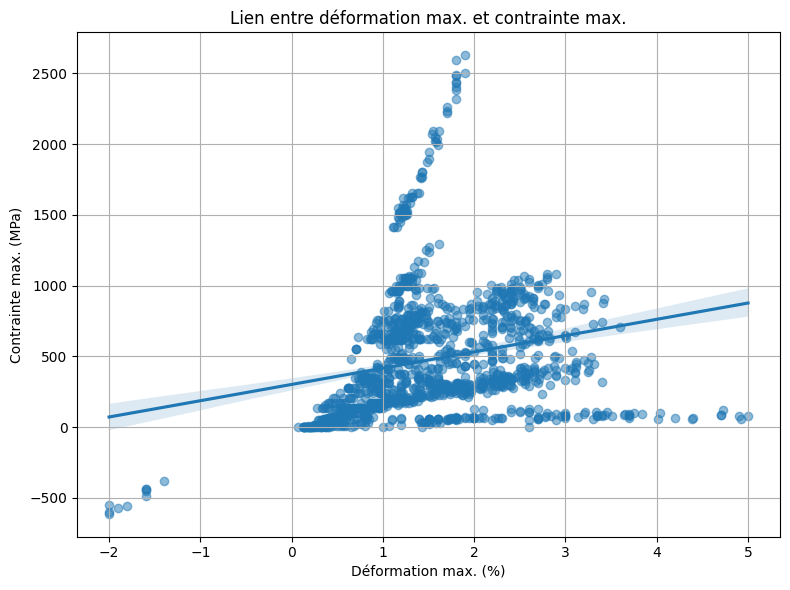

In [20]:
df["Max. % Strain"] = pd.to_numeric(df["Max. % Strain"], errors="coerce")
df["Max. Stress, MPa"] = pd.to_numeric(df["Max. Stress, MPa"], errors="coerce")

# supprimer les lignes inexploitables
df_scatter = df.dropna(subset=["Max. % Strain", "Max. Stress, MPa"])

plt.figure(figsize=(8, 6))
sns.regplot(data=df_scatter, x="Max. % Strain", y="Max. Stress, MPa", scatter_kws={'alpha':0.5})
plt.title("Lien entre déformation max. et contrainte max.")
plt.xlabel("Déformation max. (%)")
plt.ylabel("Contrainte max. (MPa)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Boxplot du Max. Stress par Lay-up

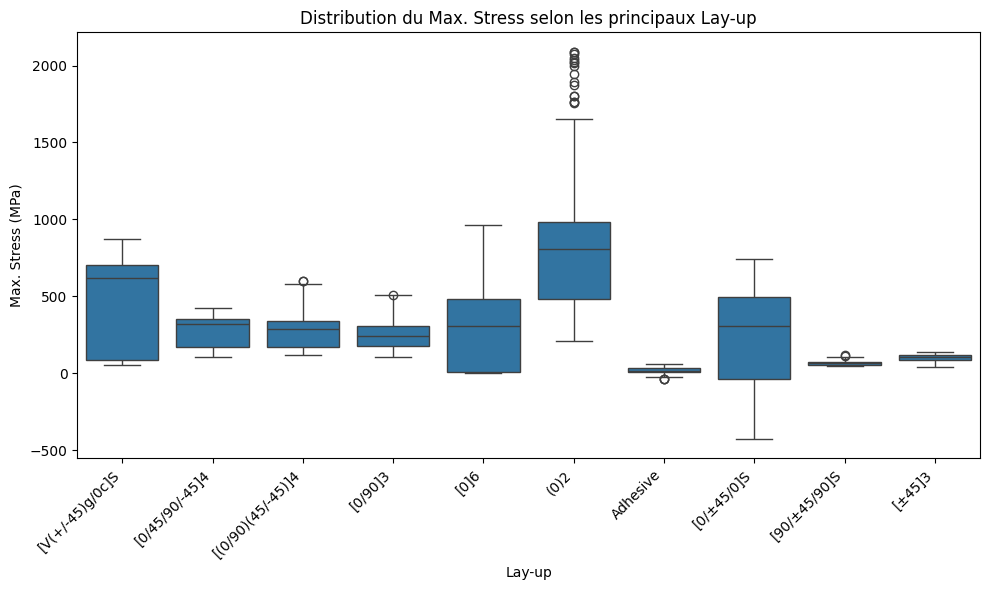

In [21]:
# pour nettoyer les colonnes nécessaires
df["Max. Stress, MPa"] = pd.to_numeric(df["Max. Stress, MPa"], errors="coerce")
df["Lay-up"] = df["Lay-up"].astype(str)

# supprimer les valeurs manquantes
df_box = df.dropna(subset=["Max. Stress, MPa", "Lay-up"])

# ne garder que les lay-ups les plus fréquents pour la lisibilité
top_layups = df_box["Lay-up"].value_counts().head(10).index
df_box_filtered = df_box[df_box["Lay-up"].isin(top_layups)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box_filtered, x="Lay-up", y="Max. Stress, MPa")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution du Max. Stress selon les principaux Lay-up")
plt.xlabel("Lay-up")
plt.ylabel("Max. Stress (MPa)")
plt.tight_layout()
plt.show()

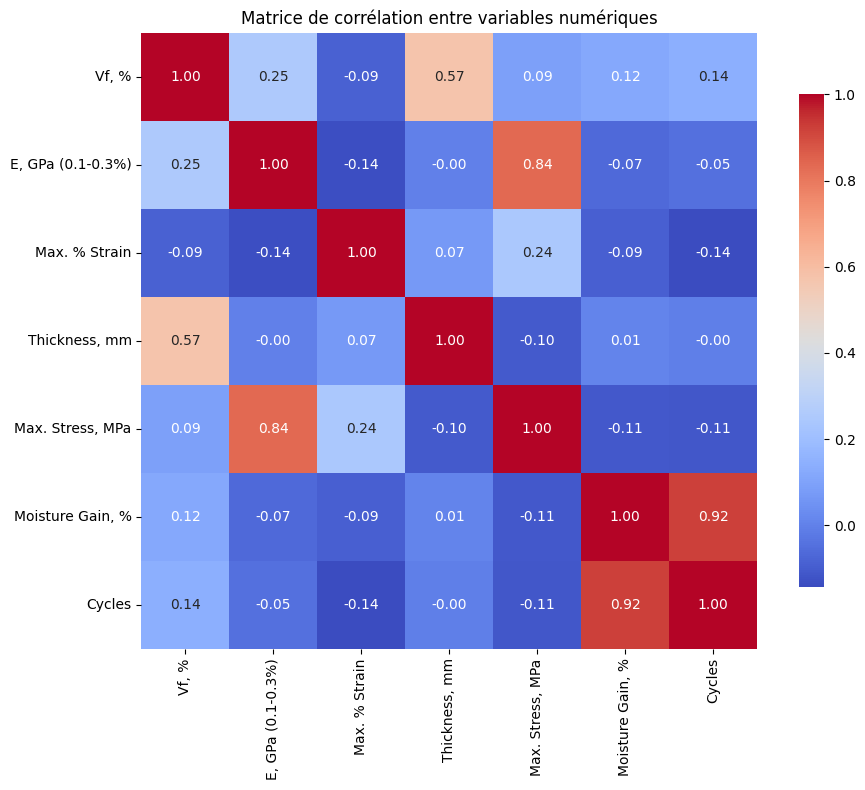

In [22]:
# Sélection des colonnes numériques pertinentes
cols = ["Vf, %", "E, GPa (0.1-0.3%)", "Max. % Strain", "Thickness, mm", "Max. Stress, MPa", "Moisture Gain, %", "Cycles"]

# Convertir les colonnes en format numérique (sécurise l’analyse)
df_corr = df[cols].apply(pd.to_numeric, errors="coerce").dropna()

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation entre variables numériques")
plt.tight_layout()
plt.show()

C:\Users\adam2\AppData\Local\Temp\ipykernel_15856\1412588103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resin_counts.values, y=resin_counts.index, palette="viridis")


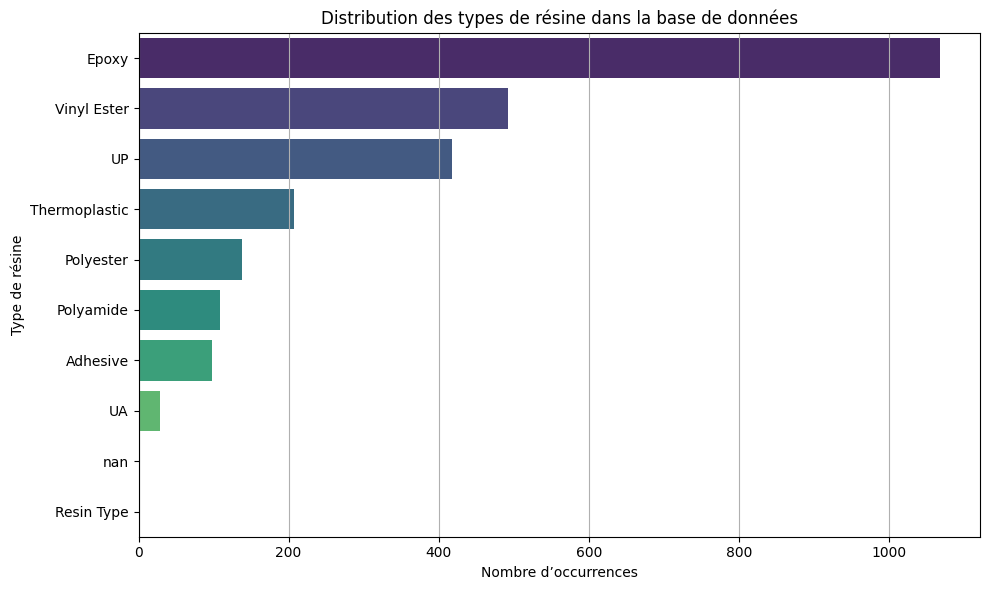

In [23]:
# Assurez-vous que la colonne est bien au format string
df["Resin Type"] = df["Resin Type"].astype(str)

# Compte des types de résine
resin_counts = df["Resin Type"].value_counts().sort_values(ascending=False)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=resin_counts.values, y=resin_counts.index, palette="viridis")
plt.title("Distribution des types de résine dans la base de données")
plt.xlabel("Nombre d’occurrences")
plt.ylabel("Type de résine")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

### Sélection et nettoyage des colonnes

On sélectionne les colonnes les plus explicatives, bien remplies et directement liées à la performance mécanique (Max. Stress, MPa) :

### Features (X) :

"Vf, %" : taux de fibre

"E, GPa (0.1-0.3%)" : module d'élasticité

"Max. % Strain" : déformation maximale

"Thickness, mm" : épaisseur

"Cycles" : nombre de cycles (fatigue)

"Resin Type" : type de résine (catégorielle)

### Target (y) :

"Max. Stress, MPa" : à prédire

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# recharger le dataframe
df = pd.read_csv("MHK_material_database_cleaned.csv")

# colonnes utiles
num_cols = ["Vf, %", "E, GPa (0.1-0.3%)", "Max. % Strain", "Thickness, mm", "Cycles"]
cat_cols = ["Resin Type"]
target_col = "Max. Stress, MPa"

# supprimer lignes incomplètes
df_model = df[num_cols + cat_cols + [target_col]].dropna()

# séparer X et y
X = df_model[num_cols + cat_cols]
y = df_model[target_col]

###  Pipeline de transformation + entraînement du modèle

In [25]:
# préparation des transformations
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

# pipeline complete
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
model.fit(X_train, y_train)

# prédiction
y_pred = model.predict(X_test)

# évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Modèle entraîné.")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

Modèle entraîné.
RMSE : 150.59
R² : 0.88


J'ai entraîné un modèle de régression linéaire sur les propriétés de chaque matériau afin de prédire leur résistance maximale en traction (Max. Stress, MPa). Avec un RMSE de 150 MPa et un R² de 0.88, le modèle offre une performance très satisfaisante.

Cela confirme que les propriétés physiques (telles que le pourcentage de fibres, l’épaisseur, le module élastique…) et la nature de la résine influencent fortement les performances mécaniques en traction uniaxiale.

### Analyse des coefficients du modèle linéaire (influence des paramètres sur la résistance)


In [26]:
# récupérer le modèle linéaire
linreg = model.named_steps['regressor']

# récupérer les noms de features
# Colonnes numériques directes
feature_names = num_cols

# colonnes catégorielles encodées
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

# concaténer tous les noms
all_features = feature_names + list(cat_feature_names)

# associer coefficients à leurs noms
coeffs = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': linreg.coef_
})

# trier par valeur absolue
coeffs['Importance'] = coeffs['Coefficient'].abs()
coeffs_sorted = coeffs.sort_values(by='Importance', ascending=False)

print("Principaux paramètres influents sur la résistance:")
print(coeffs_sorted.head(10))


Principaux paramètres influents sur la résistance:
              Feature  Coefficient  Importance
2       Max. % Strain   142.101148  142.101148
3       Thickness, mm   -58.094348   58.094348
8    Resin Type_Epoxy   -30.286520   30.286520
7      Resin Type_EP1    17.929315   17.929315
1   E, GPa (0.1-0.3%)    14.218550   14.218550
20     Resin Type_VE7     9.600687    9.600687
13    Resin Type_PETG     3.945255    3.945255
16      Resin Type_UA    -3.152544    3.152544
12     Resin Type_PET     3.072243    3.072243
11     Resin Type_PA6     2.900419    2.900419


| Paramètre              | Coefficient | Influence absolue                 |
| ---------------------- | ----------- | --------------------------------- |
| `Max. % Strain`        | +142.10     | Très forte influence positive     |
| `Thickness, mm`        | −58.09      | Influence négative marquée        |
| `Resin Type_Epoxy`     | −30.29      | Impact négatif du type "Epoxy"    |
| `Resin Type_EP1`       | +17.93      | Légère influence positive         |
| `E, GPa (0.1-0.3%)`    | +14.22      | Contribution modérée              |
| `Resin Type_VE7`, etc. | ± Faible    | Influences secondaires            |

### Analyse de l’importance des variables dans la prédiction de la résistance

Principaux paramètres influents sur la résistance:
              Feature  Coefficient  Importance
2       Max. % Strain   142.101148  142.101148
3       Thickness, mm   -58.094348   58.094348
8    Resin Type_Epoxy   -30.286520   30.286520
7      Resin Type_EP1    17.929315   17.929315
1   E, GPa (0.1-0.3%)    14.218550   14.218550
20     Resin Type_VE7     9.600687    9.600687
13    Resin Type_PETG     3.945255    3.945255
16      Resin Type_UA    -3.152544    3.152544
12     Resin Type_PET     3.072243    3.072243
11     Resin Type_PA6     2.900419    2.900419


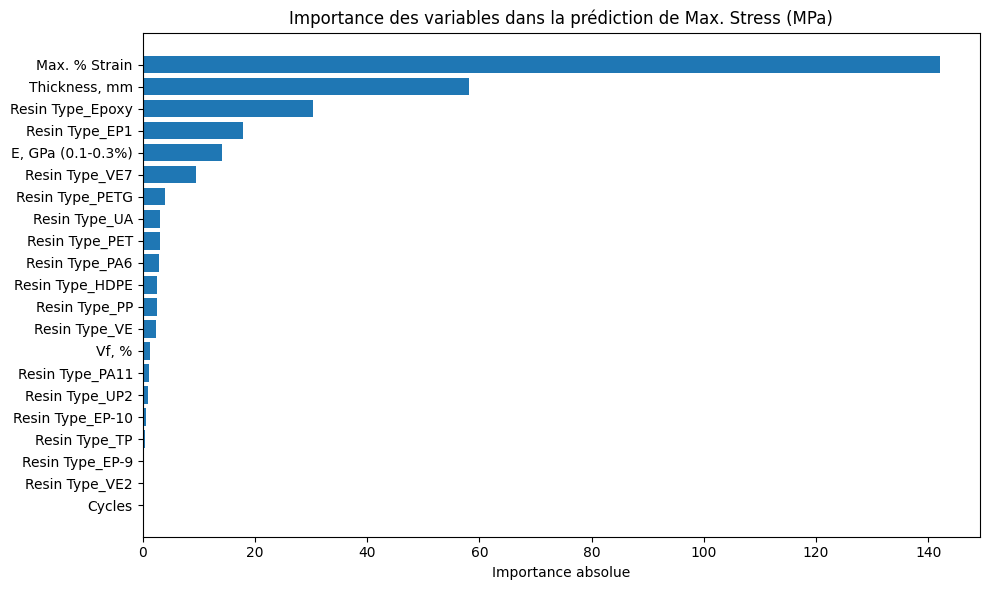

In [27]:
# pour récupérer les coefficients du modèle
linreg = model.named_steps["regressor"]
feature_names = (
    num_cols + 
    list(model.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(cat_cols))
)
coefficients = linreg.coef_

# créer un dataframe pour trier les importances
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Importance": np.abs(coefficients)
}).sort_values(by="Importance", ascending=False)

print("Principaux paramètres influents sur la résistance:")
print(coef_df.head(10))

plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Importance"])
plt.xlabel("Importance absolue")
plt.title("Importance des variables dans la prédiction de Max. Stress (MPa)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Préparation des données pour vectorisation

Je vais créer un DataFrame avec uniquement les colonnes pertinentes pour la similarité.
J'utilise les mêmes variables que dans mon modèle, et j'encode les catégorielles.

In [28]:
from sklearn.preprocessing import StandardScaler

# colonnes sélectionnées pour la similarité
num_cols = ["Vf, %", "E, GPa (0.1-0.3%)", "Max. % Strain", "Thickness, mm", "Cycles"]
cat_cols = ["Resin Type"]

# nettoyage des NaNs
df_sim = df[num_cols + cat_cols].dropna().copy()

# encodage one-hot de la résine
df_sim_encoded = pd.get_dummies(df_sim, columns=cat_cols, drop_first=True)

# normalisation
scaler = StandardScaler()
X_vector = scaler.fit_transform(df_sim_encoded)

# sauvegarde des identifiants
index_reference = df_sim.index

### Création de l’index FAISS et recherche de similarité

Je vais:

1. Créer un index FAISS à partir de tes vecteurs.

2. Sélectionner un matériau de référence.

2. Rechercher les matériaux les plus similaires.

In [ ]:
import faiss

df = pd.read_csv("../data/processed/MHK_material_database_cleaned.csv")

# sélection de colonnes pertinentes
features = ["Vf, %", "E, GPa (0.1-0.3%)", "Max. % Strain", "Thickness, mm", "Max. Stress, MPa"]
df_vect = df[features].dropna()

# mise au bon format float32
X = df_vect.to_numpy().astype("float32")

# création d'un index FAISS
index = faiss.IndexFlatL2(X.shape[1])  # L2 = distance euclidienne
index.add(X)

print(f"Index FAISS créé avec {index.ntotal} vecteurs")

Index FAISS créé avec 1279 vecteurs


### Recherche dans l’index

Trouver les matériaux les plus proches de celui-ci (ex. Max Stress = 800 MPa, Strain = 1.2%)

In [30]:
query_vector = np.array([[42.0, 60.0, 1.2, 2.0, 50000]], dtype='float32')

# requête FAISS
D, I = index.search(query_vector, k=5)  # k = nombre de voisins à retourner

# affichage des indices et distances
print("Indices des matériaux les plus proches :", I)
print("Distances FAISS (plus c’est bas, mieux c’est) :", D)

# récupération dans le DataFrame
results = df_vect.iloc[I[0]]
print("Matériaux similaires :")
print(results)

Indices des matériaux les plus proches : [[896 897 895 900 901]]
Distances FAISS (plus c’est bas, mieux c’est) : [[2.2442053e+09 2.2477123e+09 2.2563482e+09 2.2572040e+09 2.2578693e+09]]
Matériaux similaires :
     Vf, %  E, GPa (0.1-0.3%)  Max. % Strain  Thickness, mm  Max. Stress, MPa
900   48.4              123.0            1.9           1.88            2627.0
901   48.4              124.0            1.8           2.02            2590.0
899   48.4              115.0            1.9           1.74            2499.0
904   48.4              121.0            1.8           1.70            2490.0
906   48.4              124.0            1.8           2.18            2483.0


In [31]:
df_materials = df[['Material'] + num_cols].dropna().reset_index(drop=True)
results = df_materials.iloc[I[0]]
print("Matériaux similaires:")
print(results)

Matériaux similaires:
                    Material  Vf, %  E, GPa (0.1-0.3%)  Max. % Strain  \
896  FAU_Long_term_Saturated   48.4              121.0            1.8   
897  FAU_Long_term_Saturated   48.4              121.0            1.8   
895  FAU_Long_term_Saturated   48.4              123.0            1.8   
900  FAU_Long_term_Saturated   48.4              123.0            1.8   
901  Partial_Saturation_300h   56.4               26.2            1.5   

     Thickness, mm  Cycles  
896           1.80     1.0  
897           1.70     1.0  
895           1.74     1.0  
900           1.72     1.0  
901           3.54     1.0  


## Conclusion

### Résumé des insights

Au cours de cette étude des matériaux composites, plusieurs analyses clés ont été réalisées :

- **Base de données structurée** : création d'une base relationnelle SQLite à partir d’un CSV brut, facilitant les requêtes et l’analyse.
- **Statistiques descriptives** :
  - Les matériaux comme `FAU_Long_term_Saturated` ou les résines `Derakane 510A-40` présentent des valeurs très élevées de contrainte maximale.
  - Les lay-ups influencent fortement le taux de fibre et l'épaisseur.
- **Visualisations** :
  - Relations claires entre `Vf (%)`, `Max. Strain`, `E` et `Max. Stress`.
  - Certains types de résines (ex : Epoxy, VE7) se démarquent par leur influence sur la performance.
- **Modèle de régression linéaire** :
  - Score **R² = 0.88** : bonne capacité prédictive.
  - Variables les plus influentes : `Max. % Strain`, `Épaisseur`, `Type de résine`, `Module E`.
- **Recherche de similarité avec FAISS** :
  - Mise en place d’un index vectoriel pour retrouver les matériaux aux propriétés mécaniques proches.
  - Fonctionnalité puissante pour la recommandation de matériaux ou l’optimisation de design.

---

### Voies futures

Plusieurs axes de développement sont possibles :

#### Application interactive
Créer une **application Streamlit** permettant :
- D’explorer dynamiquement les matériaux.
- D’entrer des contraintes techniques (ex : E > 60 GPa, épaisseur < 2 mm).
- De visualiser les matériaux les plus proches selon FAISS.

#### Modèles prédictifs avancés
- Test d’algorithmes non linéaires (Random Forest, Gradient Boosting, etc.).
- Intégration de validation croisée.
- Mesures d’incertitude ou d’intervalles de confiance.

#### Simulation de nouveaux matériaux
- Générer des matériaux synthétiques en combinant les meilleures propriétés observées.
- Approche inverse : prédire la composition idéale pour une résistance cible.

#### Améliorations techniques
- Ajout d’une interface CRUD pour gérer les matériaux (ajout, édition, suppression).
- Export des modèles et des index en fichiers `.pkl` ou `.faiss`.

---

### Conclusion générale

Ce projet démontre comment **croiser les statistiques, l’IA et la recherche de similarité** peut enrichir la compréhension et la valorisation d’une base de matériaux complexes.  
Tu disposes désormais d’un socle solide pour passer à l’étape suivante : l’**exploration interactive** ou l’**optimisation automatique**.